# Data-Preprocessing for Forex market Analysis

## Importing pre-requisite modules and reading the csv file

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [164]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_h4.csv")

In [165]:
df.head(5)

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume
0,0,2012-01-02 00:00:00,1.29443,1.29525,1.29220,1.29307,3601,18,0
1,1,2012-01-02 04:00:00,1.29308,1.29464,1.29206,1.29304,4672,13,0
2,2,2012-01-02 08:00:00,1.29303,1.29681,1.29257,1.29452,11304,10,0
3,3,2012-01-02 12:00:00,1.29454,1.29512,1.29224,1.29319,9752,7,0
4,4,2012-01-02 16:00:00,1.29321,1.29413,1.29168,1.29259,6615,5,0


### Removing the unwanted columns

In [166]:
del df['Unnamed: 0']
del df['tick_volume']
del df['real_volume']
del df['spread']

### Size of the Dataset

In [167]:
df_original = df
size_of_df = len(df)
size_of_df

15539

## Adding Rolling Averages of Period 10 and 20

In [168]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [169]:
#Checking for Null Values
df.isna().sum()

time      0
open      0
high      0
low       0
close     0
SMA10     9
SMA20    19
dtype: int64

In [170]:
df = df.dropna()

In [171]:
df = df.reset_index()
del df['index']
df

,time,open,high,low,close,SMA10,SMA20
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,1.298911,1.297592
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,1.296517,1.297099
2,2012-01-05 12:00:00,1.28318,1.28471,1.27837,1.28027,1.294035,1.296460
3,2012-01-05 16:00:00,1.28027,1.28144,1.27769,1.27867,1.291641,1.295667
4,2012-01-05 20:00:00,1.27858,1.27969,1.27702,1.27904,1.289129,1.294960
...,...,...,...,...,...,...,...
15515,2021-12-30 08:00:00,1.13258,1.13268,1.12999,1.13017,1.131701,1.131851
15516,2021-12-30 12:00:00,1.13013,1.13445,1.13003,1.13039,1.131655,1.131794
15517,2021-12-30 16:00:00,1.13039,1.13401,1.12986,1.13150,1.131803,1.131826
15518,2021-12-30 20:00:00,1.13150,1.13303,1.13038,1.13257,1.132008,1.131896


## Simple visualization to explain Moving Average Crossover technique 

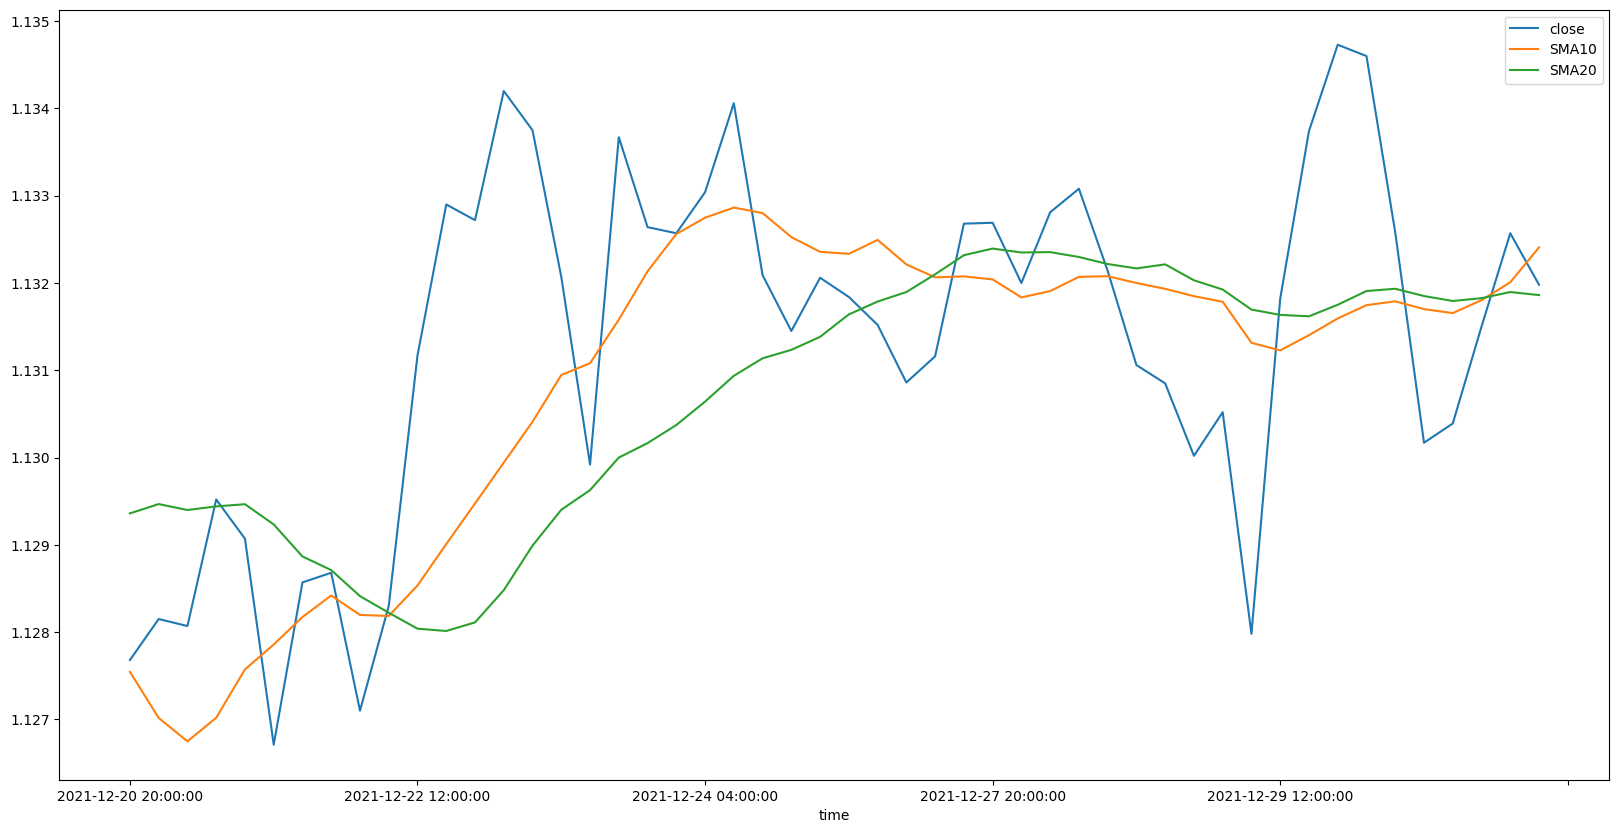

In [172]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

## Adding Signals to the Dataset

In [173]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return None

df['Signal'] = df.apply(signal,axis=1)

In [174]:
df.isna().sum()

time      0
open      0
high      0
low       0
close     0
SMA10     0
SMA20     0
Signal    2
dtype: int64

In [175]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        if raw.shift(-1)['Signal'] == 0:
            return 0
        else :
            return 1

df['Signal'] = df.apply(signal,axis=1)

In [176]:
df.isna().sum()

time      0
open      0
high      0
low       0
close     0
SMA10     0
SMA20     0
Signal    0
dtype: int64

### Filtering the signals - inorder to plot them as discrete points

In [137]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

### Categorizing the signals as Buy and Sell

In [138]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [139]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
15470,2021-12-20 20:00:00,1.12842,1.12871,1.12720,1.12768,0,1.127545,1.129360,0,NaN,NaN,NaN
15471,2021-12-21 00:00:00,1.12755,1.12848,1.12731,1.12815,0,1.127017,1.129467,0,NaN,NaN,NaN
15472,2021-12-21 04:00:00,1.12817,1.12870,1.12764,1.12807,0,1.126749,1.129399,0,NaN,NaN,NaN
15473,2021-12-21 08:00:00,1.12806,1.13028,1.12760,1.12952,0,1.127019,1.129440,0,NaN,NaN,NaN
15474,2021-12-21 12:00:00,1.12953,1.13014,1.12760,1.12907,0,1.127573,1.129466,0,NaN,NaN,NaN
15475,2021-12-21 16:00:00,1.12908,1.12921,1.12609,1.12671,0,1.127858,1.129234,0,NaN,NaN,NaN
15476,2021-12-21 20:00:00,1.12672,1.12860,1.12640,1.12857,0,1.128173,1.128866,0,NaN,NaN,NaN
15477,2021-12-22 00:00:00,1.12872,1.12941,1.12715,1.12868,0,1.128420,1.128710,0,NaN,NaN,NaN
15478,2021-12-22 04:00:00,1.12868,1.12873,1.12683,1.12710,0,1.128197,1.128413,0,NaN,NaN,NaN
15479,2021-12-22 08:00:00,1.12710,1.12855,1.12645,1.12830,0,1.128185,1.128222,0,NaN,NaN,NaN


## Calculating Total Profit for these Signals

In [140]:
df['Profit'] = np.NaN

In [141]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [142]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,0,1.298911,1.297592,1,1.0,1.29178,NaN,NaN
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,0,1.296517,1.297099,0,0.0,NaN,1.28319,-0.00859
21,2012-01-10 16:00:00,1.27851,1.28014,1.27632,1.27795,0,1.276509,1.276232,1,1.0,1.27795,NaN,0.00524
29,2012-01-12 00:00:00,1.27080,1.27272,1.27017,1.27261,0,1.273999,1.274490,0,0.0,NaN,1.27261,-0.00534
36,2012-01-13 04:00:00,1.28209,1.28778,1.28147,1.28598,0,1.277553,1.276839,1,1.0,1.28598,NaN,-0.01337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15456,2021-12-16 12:00:00,1.13134,1.13595,1.12906,1.13592,0,1.128819,1.128569,1,1.0,1.13592,NaN,-0.00424
15467,2021-12-20 08:00:00,1.12542,1.12742,1.12473,1.12621,0,1.129001,1.129161,0,0.0,NaN,1.12621,-0.00971
15480,2021-12-22 12:00:00,1.12832,1.13151,1.12813,1.13117,0,1.128534,1.128039,1,1.0,1.13117,NaN,-0.00496
15498,2021-12-27 12:00:00,1.13086,1.13232,1.13036,1.13116,0,1.132065,1.132100,0,0.0,NaN,1.13116,-0.00001


## Categorizing the signals as "Profit" and "Loss"

In [143]:
df['Category'] = None

In [144]:
subset_df = df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] == 0)]

for index in range(len(subset_df)-1):
    current_index = subset_df.index[index]
    next_index = subset_df.index[index + 1]
    
    if subset_df.at[next_index, 'Profit'] < 0:
        df.at[current_index, 'Category'] = 'Loss'
    else:
        df.at[current_index, 'Category'] = 'Profit'

In [145]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0))]

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
0,2012-01-05 04:00:00,1.29308,1.29322,1.29096,1.29178,0,1.298911,1.297592,1,1.0,1.29178,NaN,NaN,Loss
1,2012-01-05 08:00:00,1.29180,1.29434,1.28300,1.28319,0,1.296517,1.297099,0,0.0,NaN,1.28319,-0.00859,Profit
21,2012-01-10 16:00:00,1.27851,1.28014,1.27632,1.27795,0,1.276509,1.276232,1,1.0,1.27795,NaN,0.00524,Loss
29,2012-01-12 00:00:00,1.27080,1.27272,1.27017,1.27261,0,1.273999,1.274490,0,0.0,NaN,1.27261,-0.00534,Loss
36,2012-01-13 04:00:00,1.28209,1.28778,1.28147,1.28598,0,1.277553,1.276839,1,1.0,1.28598,NaN,-0.01337,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15456,2021-12-16 12:00:00,1.13134,1.13595,1.12906,1.13592,0,1.128819,1.128569,1,1.0,1.13592,NaN,-0.00424,Loss
15467,2021-12-20 08:00:00,1.12542,1.12742,1.12473,1.12621,0,1.129001,1.129161,0,0.0,NaN,1.12621,-0.00971,Loss
15480,2021-12-22 12:00:00,1.12832,1.13151,1.12813,1.13117,0,1.128534,1.128039,1,1.0,1.13117,NaN,-0.00496,Loss
15498,2021-12-27 12:00:00,1.13086,1.13232,1.13036,1.13116,0,1.132065,1.132100,0,0.0,NaN,1.13116,-0.00001,Loss


# Exploratory Data Analysis - Part 1 : General Analysis

## Percentage of Signals in whole Dataset

In [ ]:
a = len(df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0))])
b = len(df)
trade_percent = a/b * 100

## Profit Percentage

In [ ]:
profit_size = len(df[df['Category']=='Profit'])
total_signal = len(df[df['Signal-Filtered'].isna()==False])
profit_percent = round((profit_size/total_signal)*100,2)
profit_percent

40.49

In [177]:
obs_df = pd.read_csv(r"D:\SY - Class\Forex-market-analysis\Observation.csv")
del obs_df['Unnamed: 0']

In [ ]:
input_text = input("Enter Timeframe")
obs_df.loc[len(obs_df.index)+1]=[input_text,profit_percent,trade_percent]

In [ ]:
obs_df.to_csv(r"D:\SY - Class\Forex-market-analysis\Observation.csv")

In [178]:
obs_df

,TimeFrame,Profit Percentage,Total trade percentage
0,M10,35.68,5.837966
1,M15,36.46,5.773917
2,M30,36.21,5.618486
3,H1,37.74,5.629577
4,H4,40.49,5.515155
5,H12,35.97,5.359553
6,D1,35.58,6.281310
7,WK,28.57,5.363985
8,MN,12.50,6.666667
